In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score

In [7]:
hr=pd.read_csv('DS2_C5_S4_HR_Data_Challenge.csv')
hr.head

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Task 1

<AxesSubplot:xlabel='salary'>

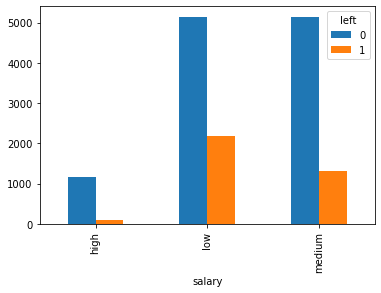

In [8]:
pd.crosstab(hr['salary'],hr['left']).plot(kind='bar')

left,0,1,rate
Department,,,
IT,954,273,0.777506
RandD,666,121,0.846252
accounting,563,204,0.734029
hr,524,215,0.709066
management,539,91,0.855556
marketing,655,203,0.763403
product_mng,704,198,0.780488
sales,3126,1014,0.755072
support,1674,555,0.751009


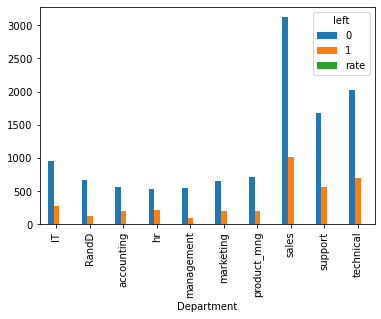

In [26]:
salarycross=pd.crosstab(hr['Department'],hr['left'])

salarycross['rate']=salarycross.iloc[:,0]/(salarycross.iloc[:,1]+salarycross.iloc[:,0])
salarycross.plot(kind='bar')
salarycross

<AxesSubplot:ylabel='rate'>

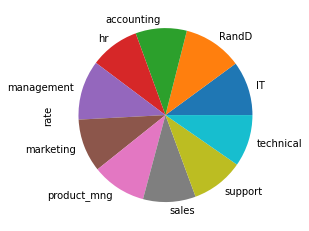

In [29]:
salarycross['rate'].plot(kind='pie')

In [31]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [32]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<AxesSubplot:>

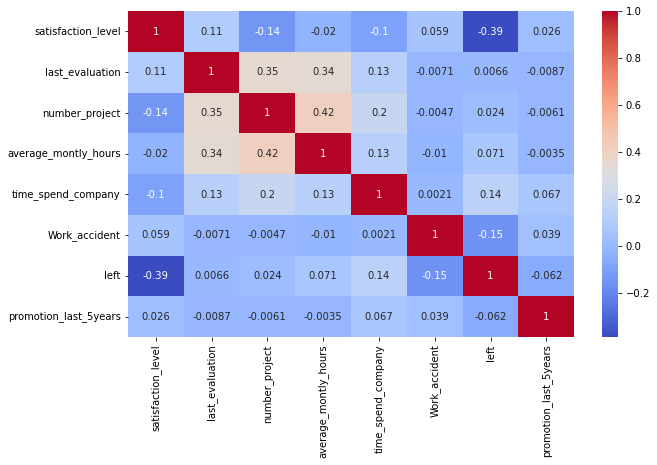

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(),annot=True,cmap='coolwarm')

In [34]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(hr['Department'])
hr['Department']=label_encoder.transform(hr['Department'])

In [35]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(hr['salary'])
hr['salary']=label_encoder.transform(hr['salary'])

<AxesSubplot:>

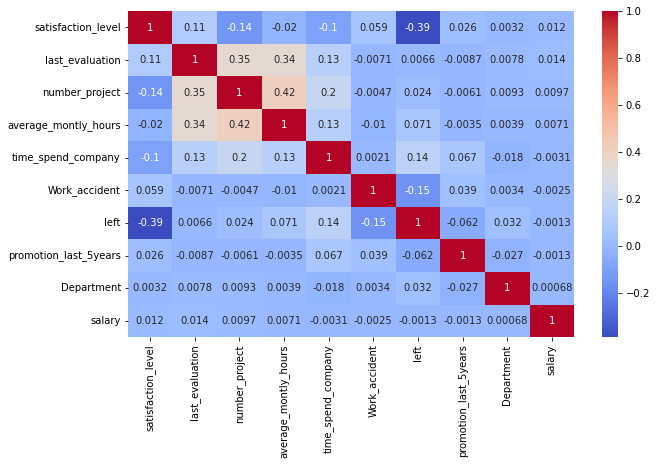

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(),annot=True,cmap='coolwarm')

In [37]:
X=hr.drop('left',axis=1)
y=hr['left']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 88)

In [43]:
model=GaussianNB()

In [44]:
model.fit(X_train,y_train)

GaussianNB()

In [45]:
model.score(X_test,y_test)

0.8093333333333333

In [46]:
y_pred=model.predict(X_test)

In [47]:
metrics.accuracy_score(y_pred,y_test)

0.8093333333333333

(array([[237., 225., 192.,  84., 145., 236., 317., 410., 383., 771.],
        [771., 383., 410., 317., 236., 145.,  84., 192., 225., 237.]]),
 array([5.55142554e-39, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 BarContainer objects>)

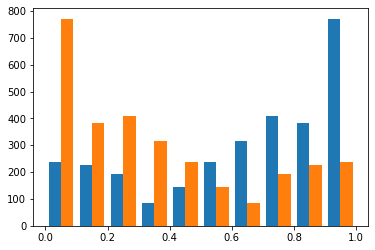

In [48]:
y_prob=model.predict_proba(X_test)
plt.hist(y_prob)

In [49]:
confusion_matrix(y_test,y_pred)

array([[1904,  359],
       [ 213,  524]], dtype=int64)

In [50]:
model1=DecisionTreeClassifier(max_depth=8)

In [51]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [52]:
y_pred=model1.predict(X_test)

In [53]:
model1.score(X_test,y_test)

0.9813333333333333

In [54]:
model1.score(X_train,y_train)

0.9840820068339028

In [55]:
X.shape

(14999, 9)

[Text(0.4253640776699029, 0.9444444444444444, 'satisfaction_level <= 0.465\ngini = 0.361\nsamples = 11999\nvalue = [9165, 2834]\nclass = satisfaction_level'),
 Text(0.21237864077669902, 0.8333333333333334, 'number_project <= 2.5\ngini = 0.482\nsamples = 3369\nvalue = [1361, 2008]\nclass = last_evaluation'),
 Text(0.1383495145631068, 0.7222222222222222, 'last_evaluation <= 0.575\ngini = 0.224\nsamples = 1392\nvalue = [179, 1213]\nclass = last_evaluation'),
 Text(0.06310679611650485, 0.6111111111111112, 'last_evaluation <= 0.445\ngini = 0.112\nsamples = 1281\nvalue = [76, 1205]\nclass = last_evaluation'),
 Text(0.05339805825242718, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = satisfaction_level'),
 Text(0.07281553398058252, 0.5, 'average_montly_hours <= 162.0\ngini = 0.067\nsamples = 1248\nvalue = [43, 1205]\nclass = last_evaluation'),
 Text(0.02912621359223301, 0.3888888888888889, 'average_montly_hours <= 125.0\ngini = 0.037\nsamples = 1224\nvalue = [23, 1201]\nclass = last_

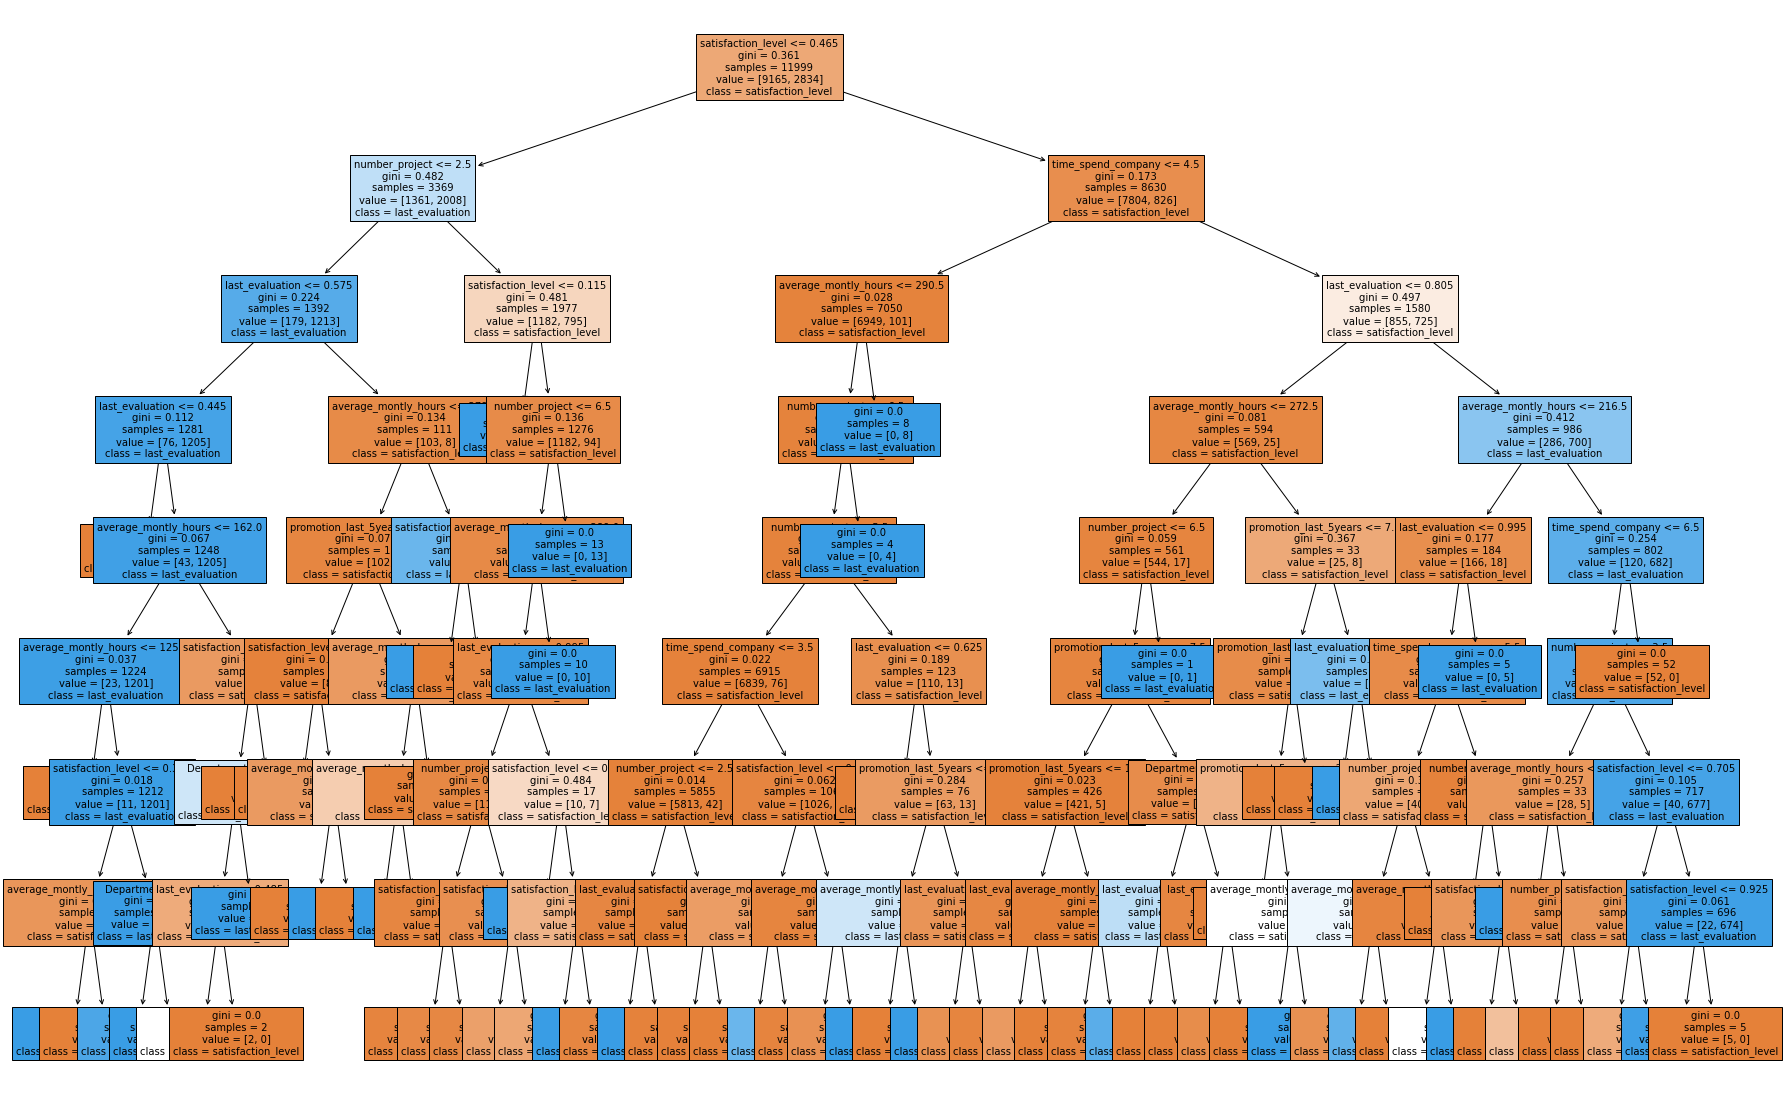

In [58]:
from sklearn import tree
plt.figure(figsize=(30,20))
cs=list(X.columns)
tree.plot_tree(model1,fontsize=10,feature_names=hr.columns,class_names=cs,filled=True)